In [44]:
# regulization

#     refer hard notes



# engineers   used this methods by default eventhough there is
# no overfitting case  is there ...because it does bnot effects model
# if ovefitting  does not have

# overfitting = exreme well in training data but
# exrtreme bad at testing data

  #  refer hard notes for more details :

   #   lets see the regularization code
   #   by scikit learn ...

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [47]:
print(data.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [48]:
x = data.data
y = data.target

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()


In [51]:
L.fit(x_train,y_train)

LinearRegression()

In [52]:
  y_pred = L.predict(x_test)

In [53]:
from sklearn.metrics import r2_score , mean_squared_error
print("r2 score" , r2_score(y_test , y_pred))
print("RMSE" , np.sqrt(mean_squared_error(y_test ,y_pred)))

# our r2 score ... here we could see that our r2 score in regression
# model is above 0 which is considered good
# but we have trained the model by using linear regression....

r2 score 0.4399338661568968
RMSE 55.627840795469155


In [54]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)
# herre alpha is lamra and  by defaults it is 1
# but we have kept here 0.0001

In [55]:
R.fit(x_train , y_train)

Ridge(alpha=0.0001)

In [56]:
y_pred1 = R.predict(x_test)

In [57]:
print("r2 score" , r2_score(y_test , y_pred1))
print("RMSE" , np.sqrt(mean_squared_error(y_test ,y_pred1)))

# by using ridge regression algorithm we got slightly better results
# because by linear we had 0.43 but by the  ridge algorithm we have 0.44

r2 score 0.4400429511552675
RMSE 55.62242316881659


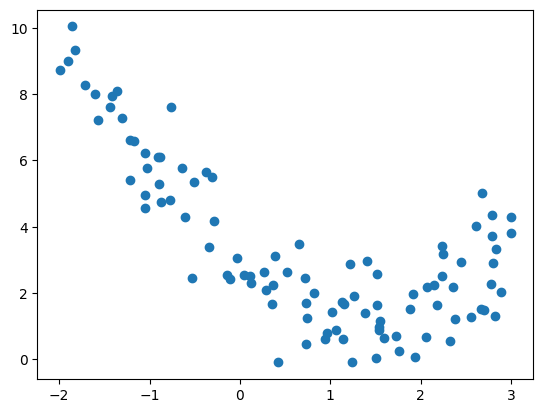

In [58]:
m = 100
x1 = 5*np.random.rand(m, 1) - 2
x2 = 0.7*x1**2 -2*x1 + 3 + np.random.randn(m , 1)
plt.scatter(x1,x2)
plt.show()

# we have generated non linear dataset to see underfitting
# visualisation nad overfitting visualisation....



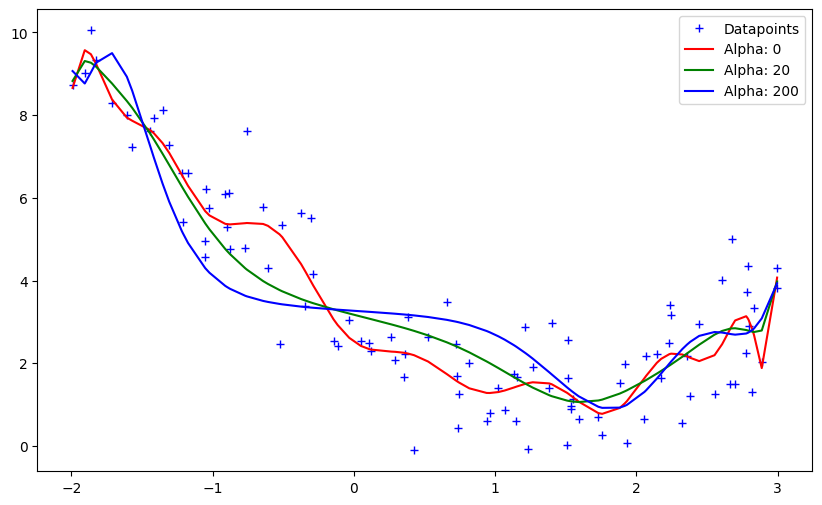

In [59]:
# here we have applied ridge regression to solve this
# also we have taken three values of alpha(lamra )
# means to  visualise the  fit line by  three values of lamra
# and 3 lines will be form
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# here we could see that at  we have also tested my algorithm
# at the lamra 0 but since it will offset my ridge algorithm and
# will  try to overfit because originally in my data set there is
# more than 8 inputs features hence more inputs feature creates
# overfitting problem....

# when we  kept lamra values 20 then ridge regression is working
# and  lets calms down the  overfiiting case ...
# not much underfiiting not much overfitting
# hence making the balance between the underfiiting and overfitting